In [1]:
import pandas as pd
import numpy as np
import spotipy

In [2]:
data = pd.read_csv("C://Users//marcs//OneDrive//Documents//Spotify//data//data.csv")
genre_data = pd.read_csv("C://Users//marcs//OneDrive//Documents//Spotify//data//data_by_genres.csv")
year_data = pd.read_csv("C://Users//marcs//OneDrive//Documents//Spotify//data/data_by_year.csv")
artist_data = pd.read_csv("C://Users//marcs//OneDrive//Documents//Spotify//data//data_by_artist.csv")

In [3]:
data['decade'] = data['year'].apply(lambda year : f'{(year//10)*10}s')

ANALYSE EXPLORATOIRE DES DONNEES

In [4]:
import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt


La musique au fil du temps


En utilisant les données regroupées par année, nous pouvons observer l'impact globale de la musique de 1921 à 2020.

<Axes: xlabel='count', ylabel='decade'>

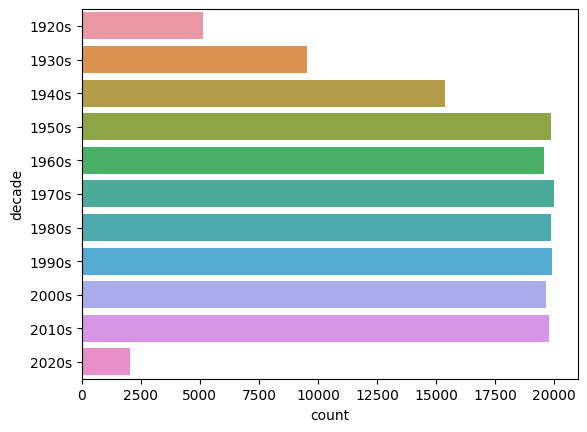

In [5]:
sns.countplot(data=data, y='decade', order=sorted(data['decade'].unique()))

In [6]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(year_data, x='year', y=sound_features,title='Tendance des différentes caractéristiques sonores au fil des décennies')
fig.show()

In [7]:
fig = px.line(year_data, x='year', y='loudness',title='Tendance du volume sonore au fil des décennies')
fig.show()

In [8]:
top10_genres = genre_data.nlargest(10, 'popularity')

fig = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group',
            title='Tendance des différentes caractéristiques sonores du Top 10 des genres')
fig.show()

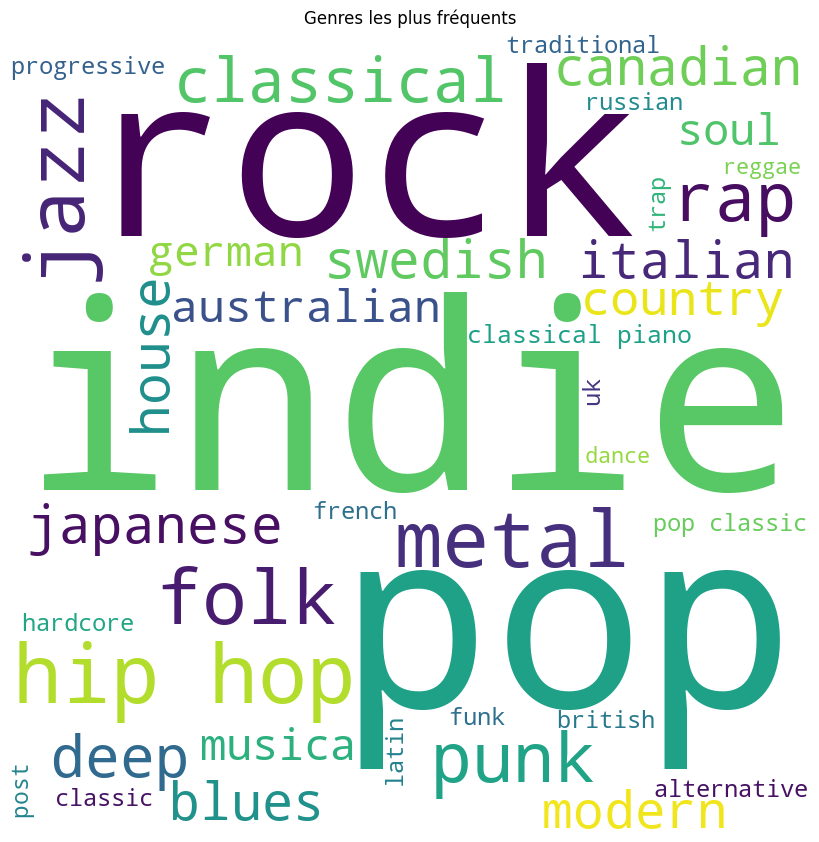

In [9]:
from wordcloud import WordCloud,STOPWORDS

stopwords = set(STOPWORDS)
comment_words = " ".join(genre_data['genres'])+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                max_words=40,
                min_font_size = 10).generate(comment_words)
                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Genres les plus fréquents")
plt.show()

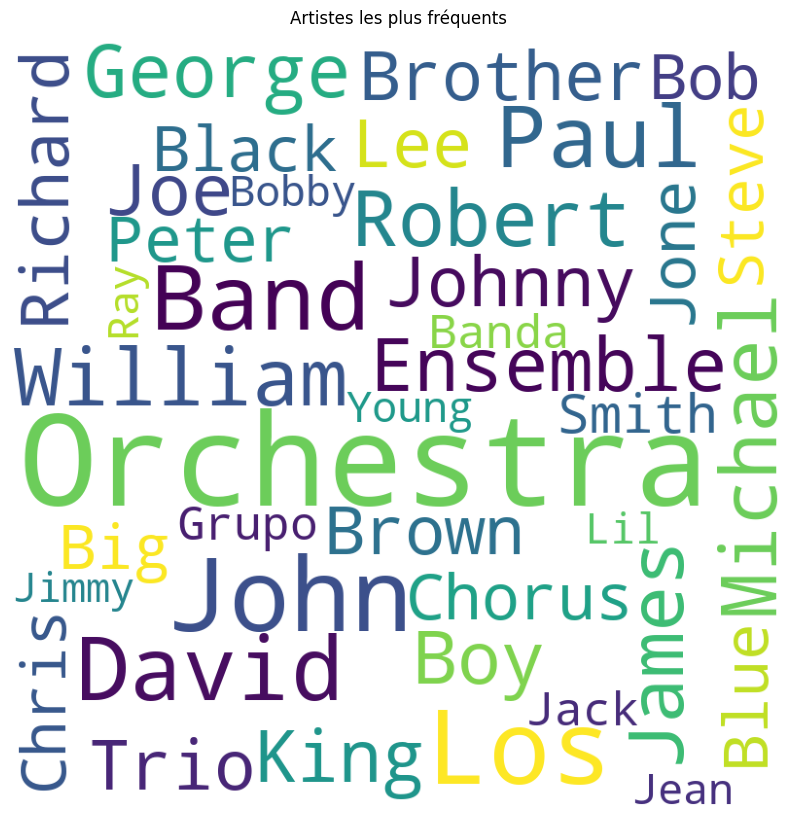

In [10]:
stopwords = set(STOPWORDS)
comment_words = " ".join(artist_data['artists'])+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_word_length=3,
                max_words=40,
                min_font_size = 10).generate(comment_words)
                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Artistes les plus fréquents")
plt.tight_layout(pad = 0)
plt.show()

In [11]:
top10_popular_artists = artist_data.nlargest(10, 'popularity')
top10_most_song_produced_artists = artist_data.nlargest(10, 'count')

In [12]:
print('Top 10 des Artistes qui ont produit le plus de chansons:')
top10_most_song_produced_artists[['count','artists']].sort_values('count',ascending=False)

Top 10 des Artistes qui ont produit le plus de chansons:


,count,artists
8367,3169,Francisco Canaro
28561,2422,Эрнест Хемингуэй
28560,2136,Эрих Мария Ремарк
8434,1459,Frank Sinatra
10714,1256,Ignacio Corsini
27109,1200,Vladimir Horowitz
1682,1146,Arturo Toscanini
2707,1103,Billie Holiday
12378,1061,Johnny Cash
7426,1023,Elvis Presley


Conclusion de l'EDA

La plupart des chansons s'étalent sur la période allant des années 1950 aux années 2010.
L'énergie des chansons a augmenté au fil du temps.
L'acoustique des chansons a considérablement diminué au fil des décennies.
Nous pouvons clairement voir que le volume sonore a nettement augmenté au fil des décennies et atteint son pic en 2020.
Parmi les 10 genres les plus populaires, l'énergie et la dansabilité sont les caractéristiques les plus remarquables.